# Pearson's Correlation 

## Regression Feature Selection (Numerical Input & Output) 

This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs. A test regression problem is prepared using the make_regression() function. Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

## Load data

In this case, we will define a dataset with 1,000 samples, each with 100 input features where 10 are informative and the remaining 90 are redundant.

In [2]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
print(X.shape, y.shape)

(1000, 100) (1000,)


## Train-Test Split

In [3]:
# split into train and test sets (67:33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [4]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


## Correlation feature selection: Pearson's correlation

Correlation is a measure of how two variables change together. Perhaps the most common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship.

Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. For feature selection, we are often interested in a positive score with the larger the positive value, the larger the relationship, and, more likely, the feature should be selected for modeling. As such the linear correlation can be converted into a correlation statistic with only positive values.

The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class. For example, we can define the SelectKBest class to use the f_regression() function and select all features, then transform the train and test sets.

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [6]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [7]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

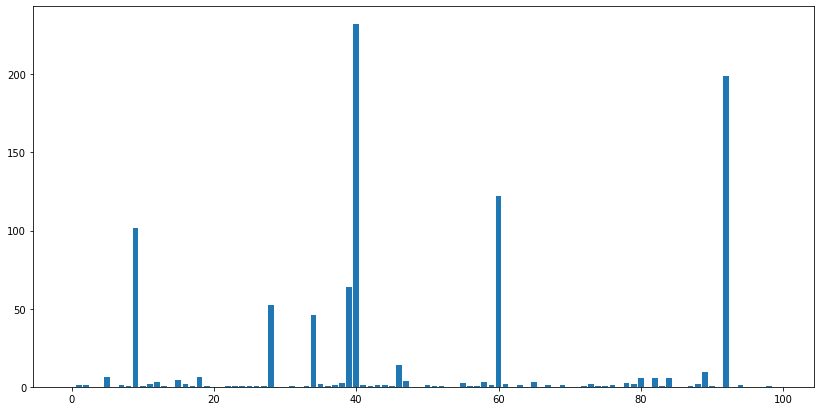

In [8]:
# plot the scores
plt.figure(figsize=(14,7))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

A bar chart of the feature importance scores for each input feature is created. The plot clearly shows 8 to 10 features are a lot more important than the other features. We could set k=10 When configuring the SelectKBest to select these top features.

## Regression model built using all features (baseline)

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use? A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

In this section, we will evaluate a Linear Regression model with all features compared to a model built from features selected by correlation statistics.

Linear regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model. As a first step, we will evaluate a LinearRegression model using all the available features. The model is fit on the training dataset and evaluated on the test dataset.

In [9]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# evaluate the model
yhat = model.predict(X_test)

In [11]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.086


In this case, we can see that the model achieves an error of about 0.086.

We would prefer to use a subset of features that achieves an error that is as good or better than this.

## Regression model built with correlation features

We can use the correlation method to score the features and select the 10 most relevant ones.

The select_features() function below is updated to achieve this.

In [12]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [13]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [14]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# evaluate the model
yhat = model.predict(X_test_fs)

In [16]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In this case, we see that the model achieved an error score of about 2.7, which is much larger than the baseline model that used all features and achieved an MAE of 0.086.

This suggests that although the method has a strong idea of what features to select, building a model from these features alone does not result in a more skillful model. This could be because features that are important to the target are being left out, meaning that the method is being deceived about what is important.

Let’s go the other way and try to use the method to remove some redundant features rather than all redundant features. We can do this by setting the number of selected features to a much larger value, in this case, 88, hoping it can find and discard 12 of the 90 redundant features.

In [17]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [18]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [19]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# evaluate the model
yhat = model.predict(X_test_fs)

In [21]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.085


In this case, we can see that removing some of the redundant features has resulted in a small lift in performance with an error of about 0.085 compared to the baseline that achieved an error of about 0.086.

## Grid Search: Tune the Number of Selected Features

In the previous example, we selected 88 features, but how do we know that is a good or best number of features to select? Instead of guessing, we can systematically test a range of different numbers of selected features and discover which results in the best performing model. This is called a grid search, where the k argument to the SelectKBest class can be tuned.

It is a good practice to evaluate model configurations on regression tasks using repeated stratified k-fold cross-validation. We will use three repeats of 10-fold cross-validation via the RepeatedKFold class.

We can define a Pipeline that correctly prepares the feature selection transform on the training set and applies it to the train set and test set for each fold of the cross-validation.

In [22]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

In [23]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [24]:
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

We can then define the grid of values to evaluate as 80 to 100.

Note that the grid is a dictionary mapping of parameter-to-values to search, and given that we are using a Pipeline, we can access the SelectKBest object via the name we gave it ‘sel‘ and then the parameter name ‘k‘ separated by two underscores, or ‘sel__k‘.

In [25]:
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]

We can then define and run the search.

In this case, we will evaluate models using the negative mean absolute error (neg_mean_absolute_error). It is negative because the scikit-learn requires the score to be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best)

In [26]:
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

In [27]:
# perform the search
results = search.fit(X, y)

In [28]:
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best MAE: -0.011
Best Config: {'sel__k': 100}


In [29]:
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-10.533 with: {'sel__k': 80}
>-9.663 with: {'sel__k': 81}
>-8.907 with: {'sel__k': 82}
>-8.366 with: {'sel__k': 83}
>-7.888 with: {'sel__k': 84}
>-7.462 with: {'sel__k': 85}
>-7.490 with: {'sel__k': 86}
>-6.138 with: {'sel__k': 87}
>-4.363 with: {'sel__k': 88}
>-3.965 with: {'sel__k': 89}
>-3.965 with: {'sel__k': 90}
>-3.583 with: {'sel__k': 91}
>-3.582 with: {'sel__k': 92}
>-3.092 with: {'sel__k': 93}
>-3.089 with: {'sel__k': 94}
>-3.091 with: {'sel__k': 95}
>-2.655 with: {'sel__k': 96}
>-1.790 with: {'sel__k': 97}
>-1.369 with: {'sel__k': 98}
>-0.506 with: {'sel__k': 99}
>-0.011 with: {'sel__k': 100}


Running the example grid searches different numbers of selected features using mutual information statistics, where each modeling pipeline is evaluated using repeated cross-validation.

In this case, we can see that the best number of selected features is 100, which achieves a MAE of about 0.011 (ignoring the sign).

We might want to see the relationship between the number of selected features and MAE. In this relationship, we may expect that more features result in better performance, to a point.

This relationship can be explored by manually evaluating each configuration of k for the SelectKBest from 81 to 100, gathering the sample of MAE scores, and plotting the results using box and whisker plots side by side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the MAE of the pipeline.

Note that we started the spread of k values at 93 instead of 80 because the distribution of MAE scores for k=80 is dramatically larger than all other values of k considered and it washed out the plot of the results on the graph.

In [30]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

In [31]:
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]-7)]

In [32]:
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=f_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

>81 -2.137 (1.243)
>82 -1.958 (1.331)
>83 -1.853 (1.350)
>84 -1.756 (1.369)
>85 -1.663 (1.385)
>86 -1.667 (1.388)
>87 -1.389 (1.399)
>88 -1.016 (1.323)
>89 -0.927 (1.293)
>90 -0.928 (1.294)
>91 -0.842 (1.261)
>92 -0.842 (1.262)


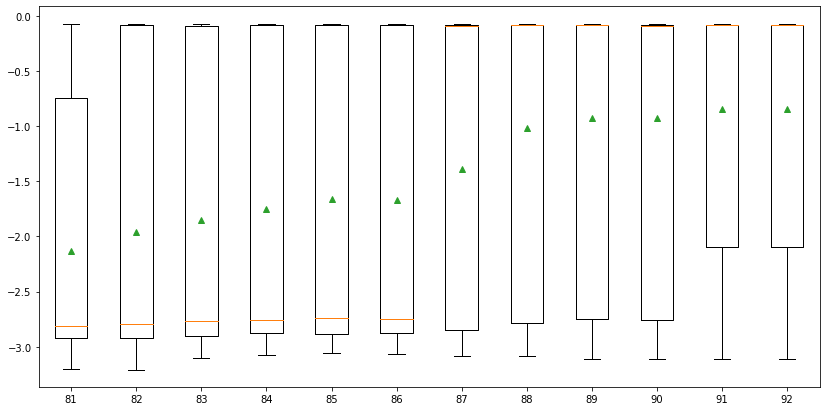

In [33]:
# plot model performance for comparison
plt.figure(figsize=(14,7))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

Box and whisker plots are created side by side showing the trend of k vs. MAE where the green triangle represents the mean and orange line represents the median of the distribution.